# Boston 주택 가격 예측 모델

데이터셋 설명
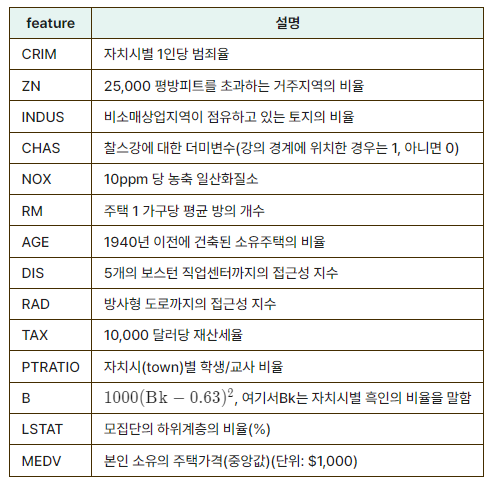

## 데이터 로드 및 전처리 

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [5]:
train_data.shape

(404, 13)

In [8]:
train_data.mean(axis=1).shape

(404,)

In [10]:
# normalization 적용

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [12]:
# 결과 확인
train_data.mean(axis=0), train_data.std(axis=0)

(array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
        -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
         1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
         6.13920356e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

## 모델 구성 및 컴파일 

- 사용하는 모델
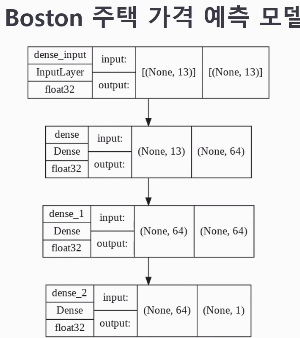

In [19]:
from tensorflow.keras import models, layers

model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(train_data.shape[1], )))

for i in range(1, 4):
    if i != 3:
        model.add(layers.Dense(64, activation='relu', name=f'dense_{i}'))
    else:
        model.add(layers.Dense(1, activation='linear', name=f'dense_{i}'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])

## 학습 및 평가

In [23]:
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=128,
                    validation_data=(test_data, test_labels))

Epoch 1/60
4/4 [==============================] - 0s 45ms/step - loss: 15.6142 - mae: 2.8083 - val_loss: 23.7687 - val_mae: 3.5657
Epoch 2/60
4/4 [==============================] - 0s 7ms/step - loss: 15.4073 - mae: 2.7942 - val_loss: 23.8392 - val_mae: 3.5617
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 15.2068 - mae: 2.7722 - val_loss: 23.6534 - val_mae: 3.5337
Epoch 4/60
4/4 [==============================] - 0s 7ms/step - loss: 15.0240 - mae: 2.7404 - val_loss: 23.4093 - val_mae: 3.4976
Epoch 5/60
4/4 [==============================] - 0s 7ms/step - loss: 14.8536 - mae: 2.7194 - val_loss: 23.1930 - val_mae: 3.4683
Epoch 6/60
4/4 [==============================] - 0s 8ms/step - loss: 14.6523 - mae: 2.7029 - val_loss: 22.8998 - val_mae: 3.4412
Epoch 7/60
4/4 [==============================] - 0s 8ms/step - loss: 14.4588 - mae: 2.6885 - val_loss: 22.6935 - val_mae: 3.4198
Epoch 8/60
4/4 [==============================] - 0s 7ms/step - loss: 14.2978 - mae: 2.67

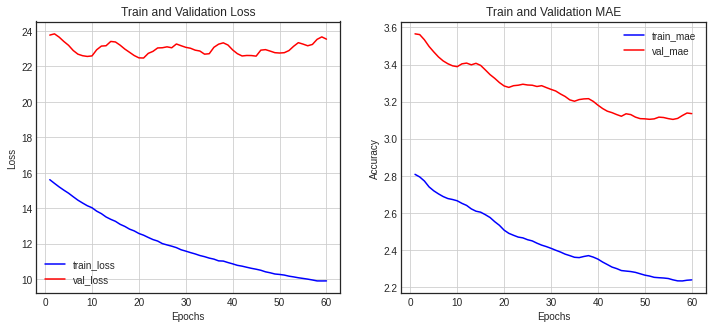

In [24]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 23.5409 - mae: 3.1356


[23.540937423706055, 3.1355767250061035]

# Reuters 딥러닝 모델

## 데이터 로드 및 전처리 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [4]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [7]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

## 모델 구성 및 컴파일 

- 사용하는 모델
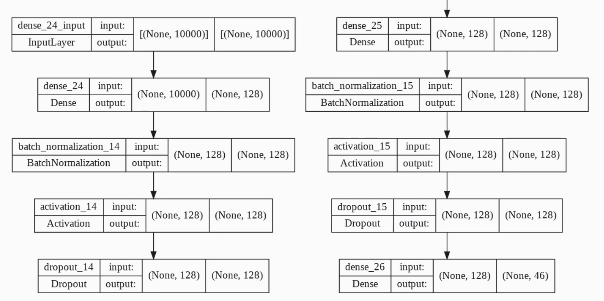

In [9]:
from tensorflow.keras import models, layers

model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(10000, )))

for i in range(1, 4):
    if i != 3:
        model.add(layers.Dense(128, name=f'dense_{i}'))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(alpha=0.01))
        model.add(layers.Dropout(0.5))
    else:
        model.add(layers.Dense(46, activation='softmax', name=f'dense_{i}'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/60
211/211 [==============================] - 4s 8ms/step - loss: 1.9508 - accuracy: 0.5588 - val_loss: 1.4616 - val_accuracy: 0.7115
Epoch 2/60
211/211 [==============================] - 1s 6ms/step - loss: 1.2213 - accuracy: 0.7113 - val_loss: 1.0565 - val_accuracy: 0.7716
Epoch 3/60
211/211 [==============================] - 1s 6ms/step - loss: 0.9749 - accuracy: 0.7696 - val_loss: 0.9704 - val_accuracy: 0.7970
Epoch 4/60
211/211 [==============================] - 1s 6ms/step - loss: 0.8038 - accuracy: 0.8049 - val_loss: 0.9238 - val_accuracy: 0.8045
Epoch 5/60
211/211 [==============================] - 1s 6ms/step - loss: 0.6953 - accuracy: 0.8293 - val_loss: 0.9139 - val_accuracy: 0.8139
Epoch 6/60
211/211 [==============================] - 1s 6ms/step - loss: 0.6087 - accuracy: 0.8469 - val_loss: 0.8840 - val_accuracy: 0.8139
Epoch 7/60
211/211 [==============================] - 1s 6ms/step - loss: 0.5223 - accuracy: 0.8652 - val_loss: 0.8975 - val_accuracy: 0.8210
Epoch 

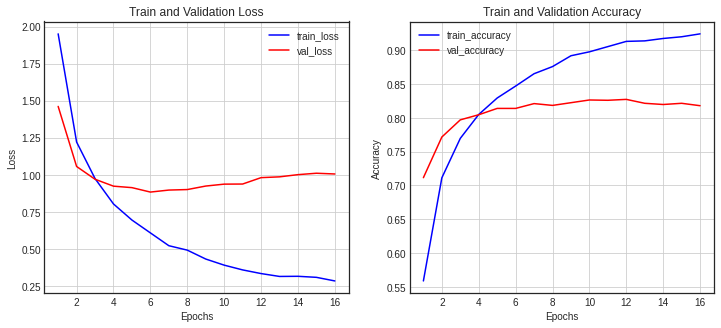

In [11]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

- 기존모델보다 확실히 개선됨 (수렴 속도, val metric)
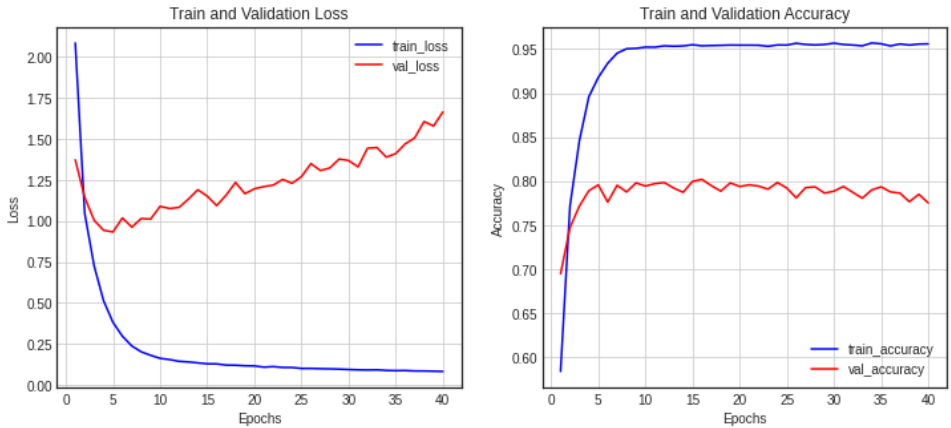

## 모델 평가 및 예측

In [12]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.7952


[0.943066418170929, 0.7951914668083191]

# CIFAR10 딥러닝 모델

## 데이터 로드 및 전처리

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [16]:
from keras.datasets import reuters
import numpy as np

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [17]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

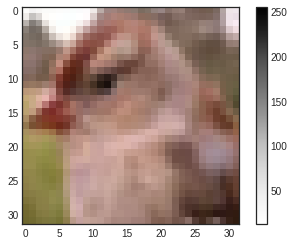

In [18]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [19]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

- 모델 구성
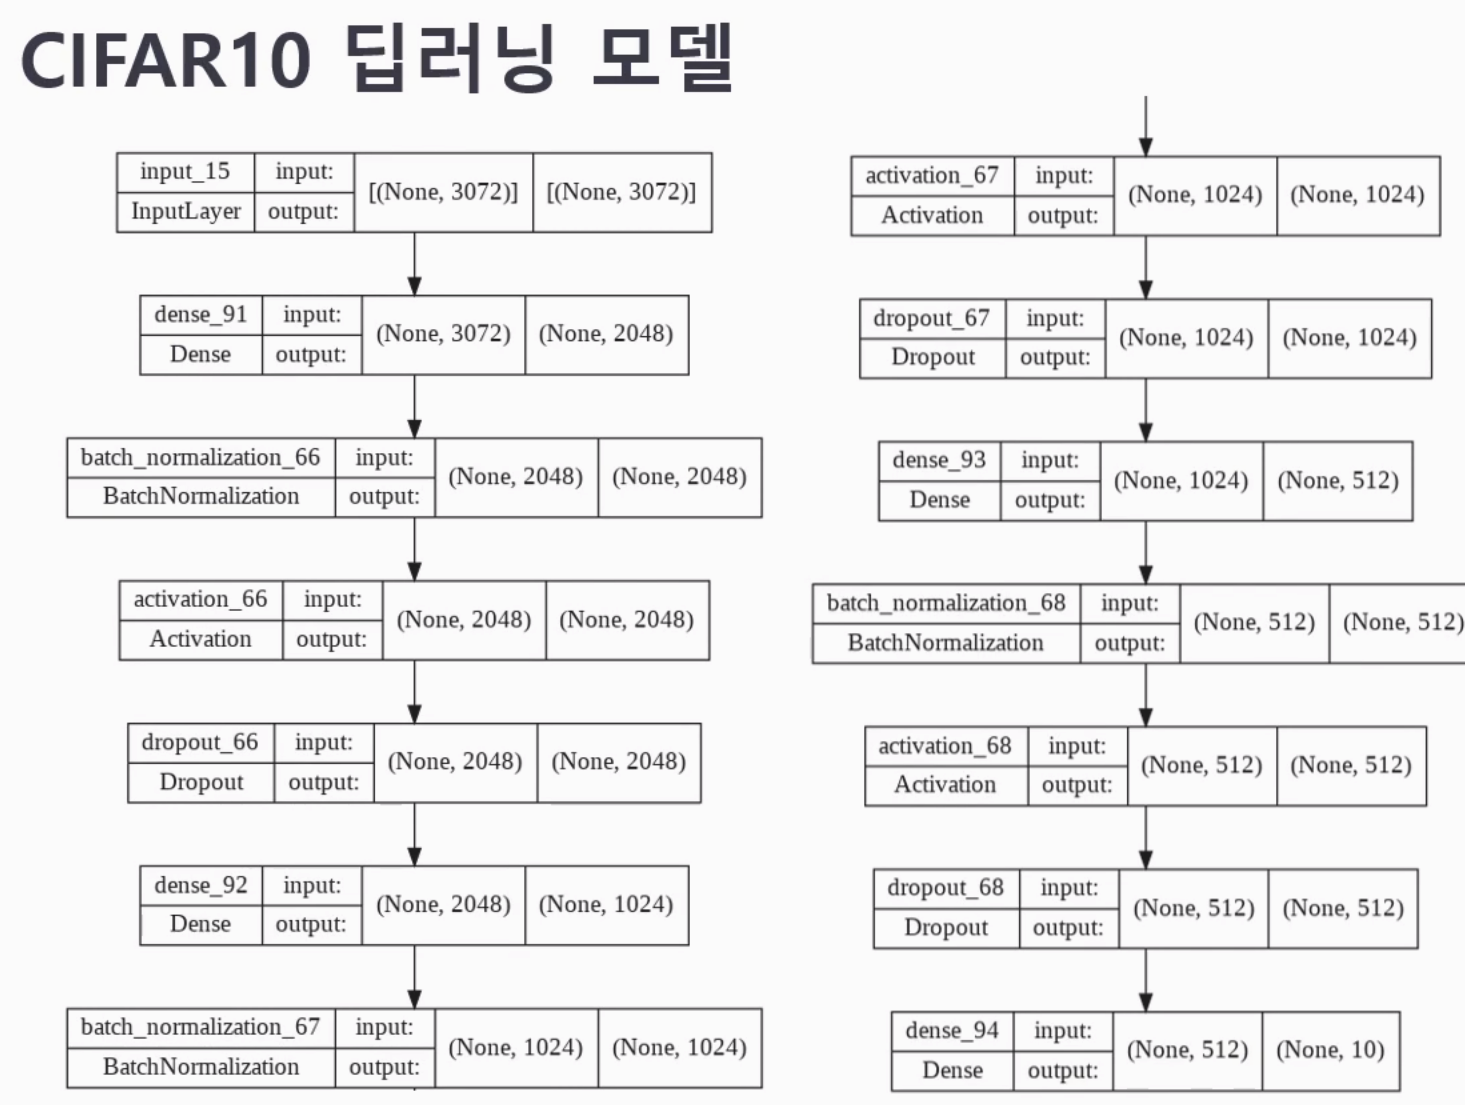

In [23]:
from tensorflow.keras import models, layers

model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(3072, )))

units = [2048, 1024, 512]

for i in range(1, 5):
    if i != 4:
        model.add(layers.Dense(units[i-1], name=f'dense_{i}'))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(alpha=0.01))
        model.add(layers.Dropout(0.5))
    else:
        model.add(layers.Dense(10, activation='softmax', name=f'dense_{i}'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)             

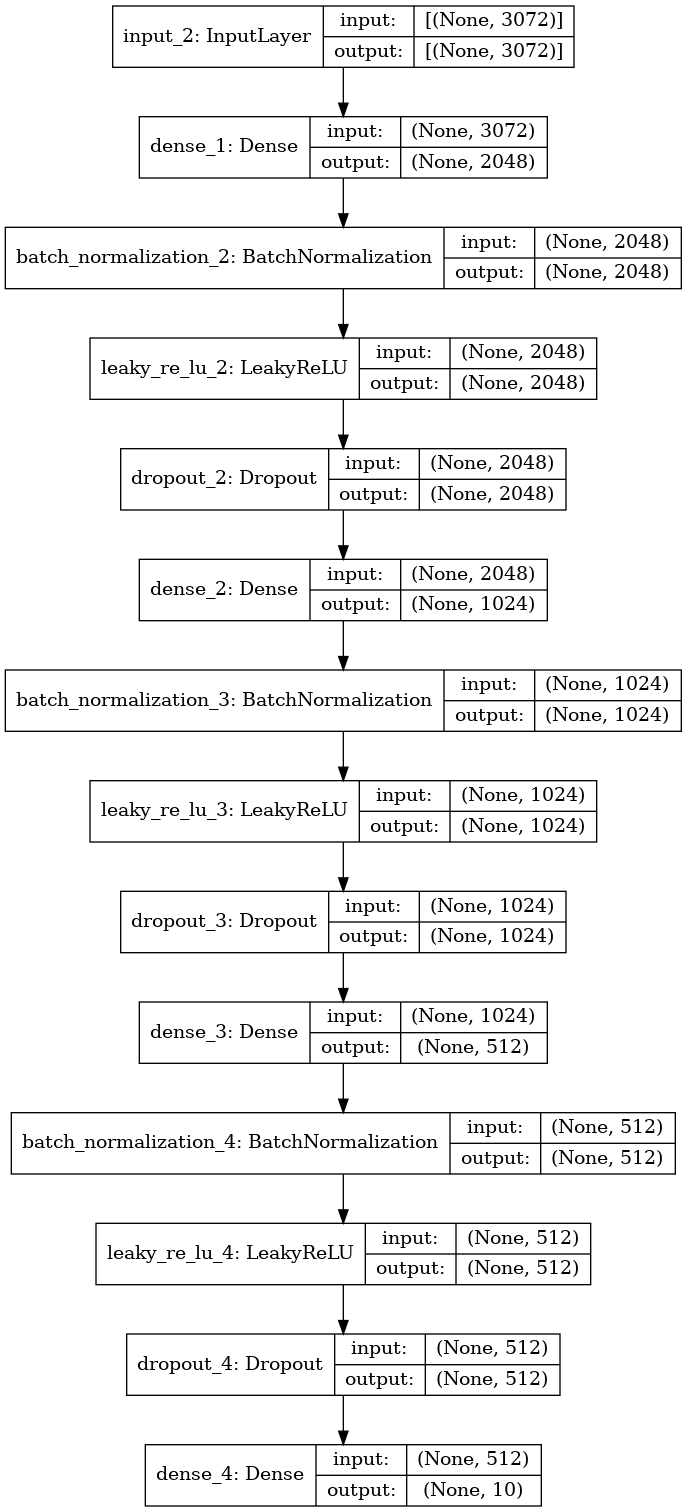

In [24]:
utils.plot_model(model, show_shapes=True)

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9552 - accuracy: 0.3181 - val_loss: 1.8366 - val_accuracy: 0.3514
Epoch 2/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6693 - accuracy: 0.4011 - val_loss: 1.8641 - val_accuracy: 0.3449
Epoch 3/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5898 - accuracy: 0.4299 - val_loss: 1.5531 - val_accuracy: 0.4434
Epoch 4/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5407 - accuracy: 0.4451 - val_loss: 1.5110 - val_accuracy: 0.4603
Epoch 5/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4929 - accuracy: 0.4644 - val_loss: 1.8187 - val_accuracy: 0.3688
Epoch 6/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4699 - accuracy: 0.4767 - val_loss: 1.5475 - val_accuracy: 0.4484
Epoch 7/60
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4313 - accuracy: 0.4859 - val_loss: 1.5333 - val_accuracy:

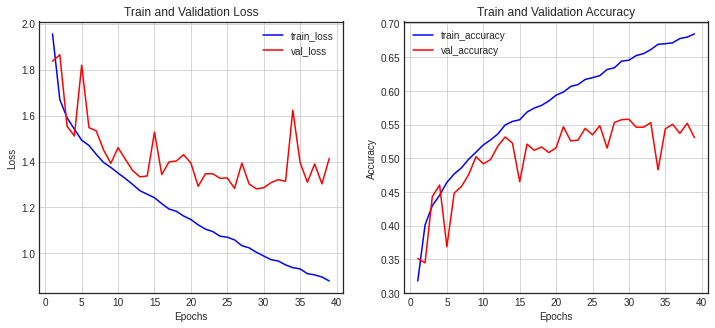

In [26]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2725 - accuracy: 0.5598


[1.2724915742874146, 0.5598000288009644]